In [1]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_folder = os.path.join('../..', 'data')
file_name = "DataForModel"

In [2]:
data = util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Season,ELO diff,Home_prob_ELO,Draw_prob_ELO,...,Diff_shots_on_target_attempted,Diff_shots_on_target_allowed,Diff_shots_attempted,Diff_shots_allowed,Diff_corners_awarded,Diff_corners_conceded,Diff_fouls_commited,Diff_fouls_suffered,Diff_yellow_cards,Diff_red_cards
0,E0,2005-09-17,Aston Villa,Tottenham,1.0,1.0,0506,-25.173204,0.412832,0.245673,...,-9,10,-14,16,20,18,-13,9,-6,0
1,E0,2005-09-17,Portsmouth,Birmingham,1.0,1.0,0506,6.045620,0.468846,0.222236,...,4,-2,4,-4,0,13,6,17,1,0
2,E0,2005-09-17,Sunderland,West Brom,1.0,1.0,0506,-32.751187,0.399092,0.251422,...,9,-1,-4,8,5,0,-1,-21,-3,1
3,E0,2005-09-18,Blackburn,Newcastle,0.0,3.0,0506,34.014412,0.517707,0.201792,...,1,-13,7,-15,5,-14,0,-2,1,0
4,E0,2005-09-18,Man City,Bolton,0.0,1.0,0506,33.333649,0.516538,0.202282,...,3,3,-8,18,-4,2,-6,-17,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33998,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,2324,-111.203962,0.303611,0.218419,...,-16,12,-18,28,1,6,6,-19,-4,0
33999,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,2324,147.385429,0.692702,0.128574,...,2,-9,13,-23,-1,5,-29,10,-6,0
34000,E3,2024-04-27,Salford,Harrogate,2.0,2.0,2324,-47.482218,0.372310,0.262627,...,-7,-7,7,-18,-8,-4,17,6,9,2
34001,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,2324,-33.608246,0.397536,0.252073,...,12,9,13,17,-13,-8,7,6,-5,1


In [6]:
data = data[data['Div'] == 'E0']
x, y = util.prepare_data(data)

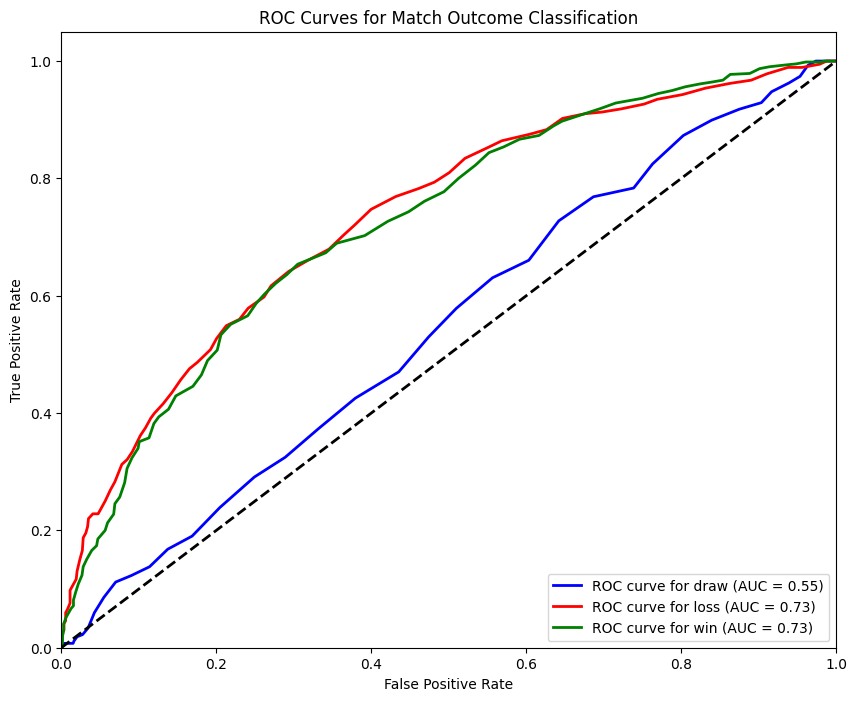

In [7]:
roc_auc, clf = util.plot_roc_curves(x, y)


Feature Importance Ranking:
1. ELO diff (0.0669)
2. Away_prob_ELO (0.0652)
3. Home_prob_ELO (0.0600)
4. Diff_opposition_mean_ELO (0.0599)
5. Diff_shots_allowed (0.0589)
6. Diff_change_in_ELO (0.0567)
7. Diff_shots_attempted (0.0566)
8. Diff_fouls_commited (0.0533)
9. Diff_fouls_suffered (0.0518)
10. Diff_corners_awarded (0.0514)
11. Diff_shots_on_target_attempted (0.0511)
12. Diff_shots_on_target_allowed (0.0503)
13. Diff_corners_conceded (0.0498)
14. Draw_prob_ELO (0.0493)
15. Matchrating (0.0432)
16. Diff_yellow_cards (0.0429)
17. Diff_goals_conceded (0.0381)
18. Diff_goals_scored (0.0378)
19. Diff_points (0.0370)
20. Diff_red_cards (0.0198)


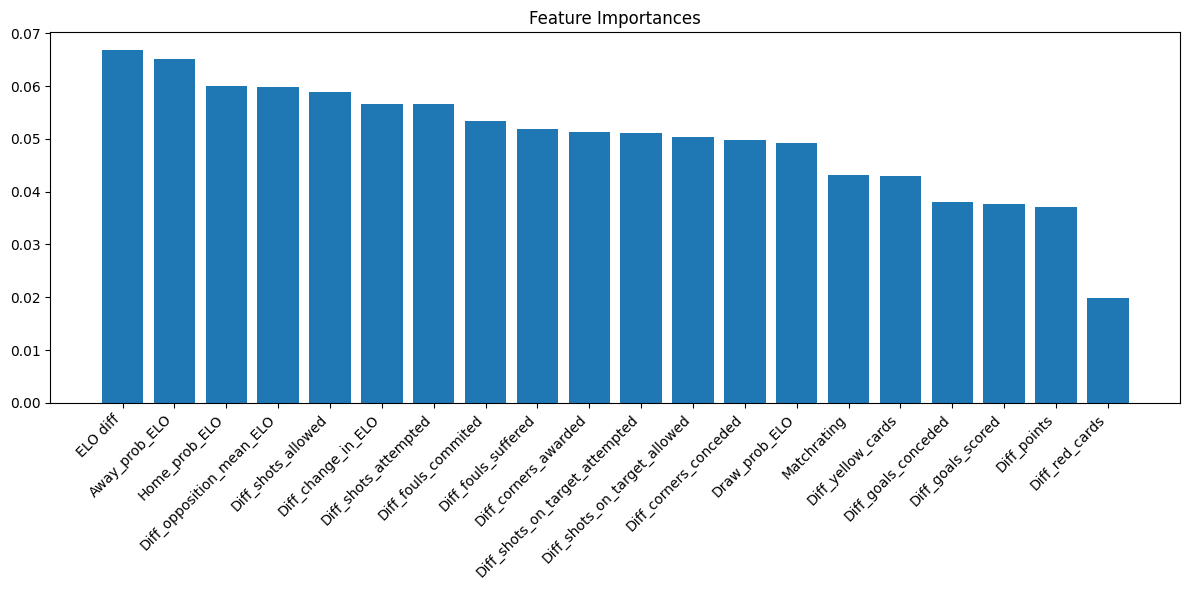

In [8]:
feature_names = x.columns
importances, indices = util.analyze_feature_importance(clf, feature_names)

plt.show()